In [2]:
import geopandas as gpd

<Axes: >

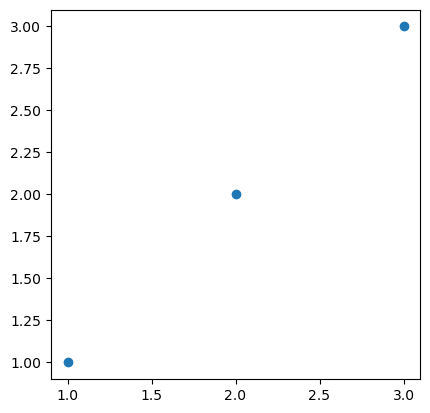

In [3]:
from shapely.geometry import Point, Polygon
import geopandas as gpd

# Create a GeoSeries of points
points = gpd.GeoSeries([Point(1, 1), Point(2, 2), Point(3, 3)])

# Visualize the points
points.plot()

<Axes: >

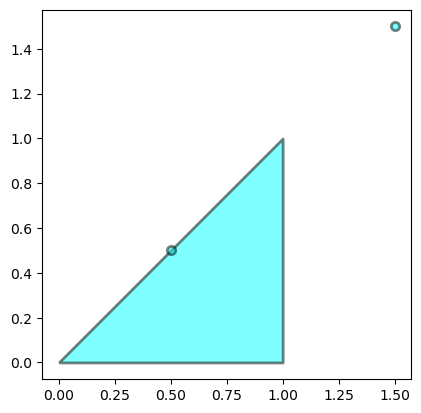

In [4]:
# Define some points and a polygon
polygon = Polygon([(0, 0), (1, 1), (1, 0)])
points = [Point(0.5, 0.5), Point(1.5, 1.5)]

# Create a GeoDataFrame
gdf = gpd.GeoDataFrame({'geometry': points + [polygon]})

# Plot the GeoDataFrame
gdf.plot(alpha=0.5, linewidth=2, edgecolor='k', color='cyan')

C:\Users\akarpinska2\AppData\Local\Temp\ipykernel_39588\3008324624.py:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


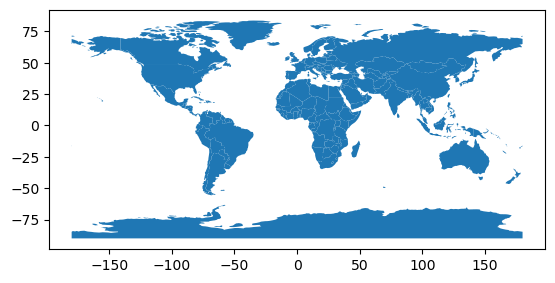

In [5]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load a sample geospacial dataset
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Plot the world map
world.plot()
plt.show()

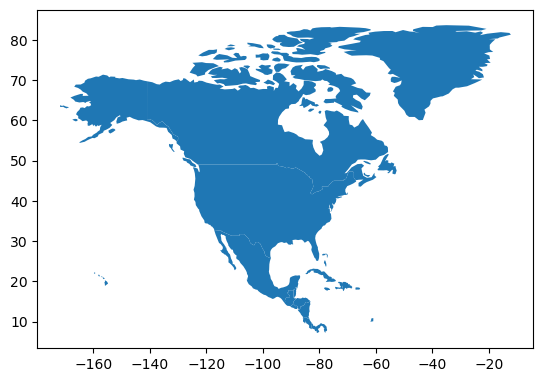

In [6]:
# Filter the GeoDataFrame for countries in North America
north_america = world[world['continent'] == 'North America']

# Plot the filtered GeoDataFrame
north_america.plot()
plt.show()

In [11]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Calculate the area of each country
world['area'] = world.geometry.area

south_america = world[world['continent'] == 'South America']

# Perform a buffer operation on a geometry
buffered_point = south_america.geometry.buffer(1)

C:\Users\akarpinska2\AppData\Local\Temp\ipykernel_39588\3311116245.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
C:\Users\akarpinska2\AppData\Local\Temp\ipykernel_39588\3311116245.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  world['area'] = world.geometry.area
C:\Users\akarpinska2\AppData\Local\Temp\ipykernel_39588\3311116245.py:9: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  buffered_point = south_america.geometry.buffer(1)


In [12]:
# Create a GeoDataFrame of cities
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

# Perform a spatial join between cities and countries
cities_with_country = gpd.sjoin(cities, world, op='within')
# Inspect the result
cities_with_country.head()

C:\Users\akarpinska2\AppData\Local\Temp\ipykernel_39588\2659042780.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_cities' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))
c:\Users\akarpinska2\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3400: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


,name_left,geometry,index_right,pop_est,continent,name_right,iso_a3,gdp_md_est,area
0,Vatican City,POINT (12.45339 41.90328),141,60297396.0,Europe,Italy,ITA,2003576,34.685652
1,San Marino,POINT (12.44177 43.93610),141,60297396.0,Europe,Italy,ITA,2003576,34.685652
226,Rome,POINT (12.48131 41.89790),141,60297396.0,Europe,Italy,ITA,2003576,34.685652
2,Vaduz,POINT (9.51667 47.13372),114,8877067.0,Europe,Austria,AUT,445075,10.179604
212,Vienna,POINT (16.36469 48.20196),114,8877067.0,Europe,Austria,AUT,445075,10.179604


In [ ]:
import geopandas as gpd
# Load two GeoDataFrames representing different layers
gdf1 = gpd.read_file("path/to/your/layer1.shp")
gdf2 = gpd.read_file("path/to/your/layer2.shp")
# Perform an overlay analysis to find the intersection
intersection = gpd.overlay(gdf1, gdf2, how='intersection')
# Plot the result
intersection.plot()

In [ ]:
# Create a buffer of 1 km around each point in a GeoDataFrame
buffered_points = gdf1.geometry.buffer(1000)
# Plot the buffered geometries
buffered_points.plot()

In [ ]:
from sklearn.neighbors import BallTree
import numpy as np

# Convert the geometries to a numpy array of coordinates
coordinates = np.array(gdf1.geometry.apply(lambda geom: (geom.x, geom.y)).tolist())
# Create a BallTree for efficient spatial queries
tree = BallTree(coordinates, leaf_size=15, metric='haversine')
# Query the tree for the nearest neighbor of a specific point
distance, index = tree.query([a_specific_point.coords[0]], k=1)
# Find the nearest geometry in gdf1
nearest_geometry = gdf1.iloc[index[0]]

In [ ]:
import contextily as ctx
# Plot the GeoDataFrame
ax = gdf1.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
# Add a basemap
ctx.add_basemap(ax, crs=gdf1.crs.to_string(), source=ctx.providers.Stamen.Terrain)

<Axes: >

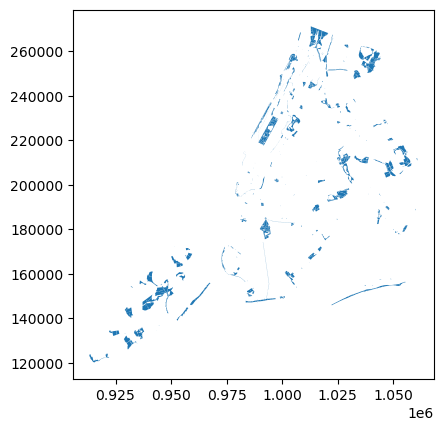

In [16]:
import geopandas as gpd

# Load the GeoJSON data into a GeoDataFrame
parks_gdf = gpd.read_file("https://data.cityofnewyork.us/api/geospatial/rjaj-zgq7?method=export&format=GeoJSON")

# Ensure the GeoDataFrame is using a projected coordinate system for area calculation
parks_gdf = parks_gdf.to_crs(epsg=2263)  
# EPSG:2263 is for New York Long Island (feet)

# Calculate the area of each park in square feet
parks_gdf['area'] = parks_gdf.geometry.area

# Inspect the first few rows of the GeoDataFrame
parks_gdf.head()

# Plot the parks
parks_gdf.plot()

In [17]:
# Check for missing values
print(parks_gdf.isnull().sum())

# Check the data types and attributes
print(parks_gdf.dtypes)

# Ensure all geometries are valid
parks_gdf = parks_gdf[parks_gdf.is_valid]

propname           0
retireddate        0
zipcode            0
acres              0
location           0
nys_assembly       0
councildistrict    0
description        0
us_congress        0
gispropnum         0
retired            0
communityboard     0
department         0
subcategory        0
precinct           0
omppropid          0
sitename           0
nys_senate         0
borough            0
geometry           0
area               0
dtype: int64
propname             object
retireddate          object
zipcode              object
acres                object
location             object
nys_assembly         object
councildistrict      object
description          object
us_congress          object
gispropnum           object
retired              object
communityboard       object
department           object
subcategory          object
precinct             object
omppropid            object
sitename             object
nys_senate           object
borough              object
geometry      

C:\Users\akarpinska2\AppData\Local\Temp\ipykernel_39588\4199537508.py:2: FutureWarning: The default value of numeric_only in aggfunc='sum' within pandas.DataFrameGroupBy.agg used in dissolve is deprecated. In pandas 2.0, numeric_only will default to False. Either specify numeric_only as additional argument in dissolve() or select only columns which should be valid for the function.
  park_areas_by_borough = parks_gdf.dissolve(by='borough', aggfunc='sum')


<Axes: >

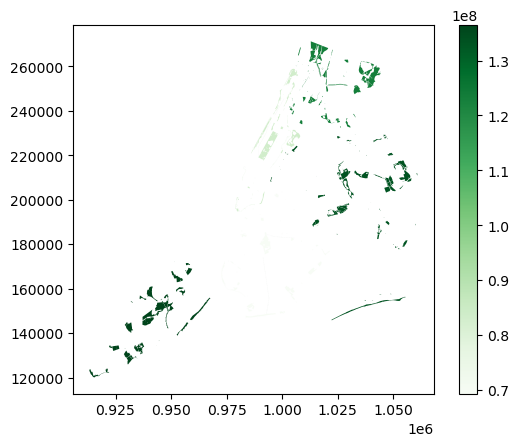

In [18]:
# Aggregate the data by borough and sum the park areas
park_areas_by_borough = parks_gdf.dissolve(by='borough', aggfunc='sum')
# Plot the results
park_areas_by_borough.plot(column='area', legend=True, cmap='Greens')

In [ ]:
import matplotlib.pyplot as plt
import contextily as ctx

# Plot the parks
ax = parks_gdf.plot(figsize=(10, 10), color='green', alpha=0.5)
# Add a basemap
ctx.add_basemap(ax, crs=parks_gdf.crs.to_string())
# Set the title
ax.set_title("Spatial Distribution of Public Parks in New York City")
plt.show()

In [ ]:
from geopandas.tools import sjoin
from shapely.geometry import Point
import numpy as np

# Create a grid of points across the city
x = np.linspace(parks_gdf.bounds.minx.min(), parks_gdf.bounds.maxx.max(), num=100)
y = np.linspace(parks_gdf.bounds.miny.min(), parks_gdf.bounds.maxy.max(), num=100)
xx, yy = np.meshgrid(x, y)
grid_points = gpd.GeoDataFrame(geometry=gpd.points_from_xy(xx.flatten(), yy.flatten()), crs=parks_gdf.crs)

# Create a buffer of 500 feet around each park (adjust the distance as needed)
parks_buffered = parks_gdf.buffer(500)

# Convert the buffered GeoSeries to a GeoDataFrame
parks_buffered_gdf = gpd.GeoDataFrame(geometry=parks_buffered)

# Perform the spatial join between grid points and buffered parks
points_near_parks = gpd.sjoin(grid_points, parks_buffered_gdf, how='inner', op='intersects')

# Visualize the result
ax = points_near_parks.plot(markersize=2, color='blue', alpha=0.5, label='Near Proximity to Parks')

parks_gdf.plot(ax=ax, color='red', alpha=1, label='Parks')

ctx.add_basemap(ax, crs=parks_gdf.crs.to_string())
ax.set_title("Areas within 500m of Public Parks in New York City")
plt.show()

In [ ]:
# Assuming the parks_gdf has a 'borough' column and is projected in EPSG:2263 for area calculation in feet
borough_area = parks_gdf.dissolve(by='borough', aggfunc='sum')['area']

# Count the number of parks in each borough
park_count = parks_gdf['borough'].value_counts()

# Calculate park density per square mile (since the area is in square feet, we convert it to square miles)
park_density = park_count / (borough_area / (5280**2))

# Plot park density
park_density.plot(kind='bar', title='Park Density per Borough (Parks per Square Mile)')

In [ ]:
# Largest park
largest_park = parks_gdf.iloc[parks_gdf['area'].idxmax()]
# Smallest park
smallest_park = parks_gdf.iloc[parks_gdf['area'].idxmin()]
print(f"Largest Park: {largest_park['name']} in {largest_park['borough']}, Area: {largest_park['area']} square feet")
print(f"Smallest Park: {smallest_park['name']} in {smallest_park['borough']}, Area: {smallest_park['area']} square feet")

In [ ]:
from shapely.geometry import Point

# Define points of interest with their latitude and longitude coordinates
points_of_interest = {
    'Times Square': (-73.9855, 40.7580),
    'Central Park': (-73.9654, 40.7829),
    'Brooklyn Bridge': (-73.9969, 40.7061)
}
# Convert points of interest to a GeoDataFrame
poi_gdf = gpd.GeoDataFrame(geometry=[Point(lon, lat) for lon, lat in points_of_interest.values()], crs="EPSG:4326")
poi_gdf = poi_gdf.to_crs(parks_gdf.crs)  # Convert to the same CRS as parks_gdf for accurate distance calculation

poi_gdf

In [ ]:
# parks_gdf is your GeoDataFrame containing parks
if parks_gdf.sindex is not None:  # Check if spatial index exists
    for index, poi in poi_gdf.iterrows():
        # Query the spatial index for the nearest geometry to each point of interest
        # Pass the point geometry directly instead of its bounds
        nearest_index = list(parks_gdf.sindex.nearest(poi.geometry, return_all=True, max_distance=None))[0]
        nearest_park = parks_gdf.iloc[nearest_index[0]]  # Access the first nearest park if there are multiple

        # Calculate the distance to the nearest park (in the same units as the CRS)
        distance = poi.geometry.distance(nearest_park.geometry)
        print(f"Nearest park to {index}: {nearest_park.geometry}, Distance: {distance:.2f}")

In [ ]:
import seaborn as sns

# 'propname' column contains unique name for parks
feature_counts = parks_gdf['propname'].value_counts()

# Select the top 10 most common property names (parks)
top_10_parks = feature_counts.head(20).reset_index()
top_10_parks.columns = ['Park Name', 'Count']

# Create a Seaborn bar plot for the top 10 parks
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Park Name', data=top_10_parks, palette='viridis')

# Add plot title and labels
plt.title('Top 10 Parks in NYC by Total Count')
plt.xlabel('Feature Count')
plt.ylabel('Park Name')

plt.show()

In [ ]:
import pandas as pd
import numpy as np

# parks_gdf has a unique identifier for each park, like 'park_id'
park_ids = parks_gdf.index + 1
parks_gdf['park_id'] = parks_gdf.index + 1

# Generate sample dates
dates = pd.date_range(start='2021-01-01', end='2021-12-31', freq='D')

# Create a DataFrame to hold the visitation data
visitation_data = []

for park_id in parks_gdf['park_id']:
    for date in dates:
        # Generate a random number of visitors (between 0 and 500) for each park and date
        visitors = np.random.randint(0, 500)
        visitation_data.append({'park_id': park_id, 'date': date, 'visitors': visitors})

# Convert the list to a DataFrame
vis_df = pd.DataFrame(visitation_data)

# Ensure we have at least 1000 rows
assert len(vis_df) >= 1000

# Show the first few rows of the visitation DataFrame
vis_df.head()

In [ ]:
# Aggregate visitors by date to see overall trends
overall_trends = vis_df.groupby('date')['visitors'].sum()

# Plot overall visitation trends
overall_trends.plot(title='Overall Park Visitation Trends in 2021', ylabel='Total Visitors', xlabel='Date')

In [ ]:
import matplotlib.pyplot as plt
# Select a subset of parks for comparison
sample_parks = np.random.choice(park_ids, size=5, replace=False)
# Filter visitation data for the selected parks
sample_vis_df = vis_df[vis_df['park_id'].isin(sample_parks)]
# Pivot the data for plotting
pivot_df = sample_vis_df.pivot(index='date', columns='park_id', values='visitors')
# Plot visitation trends by park using an area plot
pivot_df.plot(kind='area', figsize=(12, 8), stacked=True, title='Visitation Trends by Park in 2021', alpha=0.5)

# Customizing the plot
plt.ylabel('Visitors')
plt.xlabel('Date')
plt.legend(title='Park ID', loc='upper right')
plt.show()

In [ ]:
# Find the top 10 days with the highest visitation
peak_days = overall_trends.nlargest(10)
# Print the peak visitation days
print("Peak Visitation Days:")
print(peak_days)

In [ ]:
# Merge the parks GeoDataFrame with the visitation DataFrame on 'park_id'
combined_gdf = parks_gdf.merge(vis_df, on='park_id')

# Inspect the combined GeoDataFrame
combined_gdf.head()

In [ ]:
# Aggregate visitation data to get the total visitors per park
total_visitors_per_park = combined_gdf.groupby('park_id')['visitors'].sum().reset_index()

# Merge this aggregated data back with parks_gdf to maintain the spatial data
parks_with_visitors_gdf = parks_gdf.merge(total_visitors_per_park, on='park_id')

In [ ]:
# Set up the figure and axis
fig, ax = plt.subplots(1, 1, figsize=(15, 15))

# Plot parks, scaling the size of each park's point by the total visitors
# check this link to find cmap color: https://matplotlib.org/stable/users/explain/colors/colormaps.html
parks_with_visitors_gdf.plot(ax=ax, column='visitors', legend=True, legend_kwds={'label': "Total Visitors per Park"},
                             markersize=parks_with_visitors_gdf['visitors'] / 100,  # Scale marker size
                             cmap='gnuplot2')  # Use a color map

# Add basemap for reference (optional, requires contextily and Internet access)
try:
    import contextily as ctx
    ctx.add_basemap(ax, crs=parks_with_visitors_gdf.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)
except Exception as e:
    print(f"Couldn't add basemap due to: {e}")

# Show the plot
plt.show()